In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir("E:\Ginu_StudyMaterials\Sem2\Dissertation\Data")
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from opencage.geocoder import OpenCageGeocode
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from numpy import asarray
from xgboost import XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

In [2]:
# reading the dataset
property_prices = pd.read_csv("PPR_ALL_v1.csv", na_values =("N/A", "NA", "--", " "), encoding = 'unicode_escape')
property_prices

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
516581,28/01/2022,"LACKEN, MULTYFARNHAM, MULLINGAR",NaN,Westmeath,305000,No,No,Second-Hand Dwelling house /Apartment,NaN
516582,28/01/2022,"LARCH HILL, COLMAN, FETHARD",NaN,Tipperary,300000,No,No,Second-Hand Dwelling house /Apartment,NaN
516583,28/01/2022,"SHERRYS WOOD, BELLEWSTOWN, CO MEATH",NaN,Meath,450000,No,No,Second-Hand Dwelling house /Apartment,NaN
516584,28/01/2022,"ST JUDES, STONEYFORD, KILKENNY",NaN,Kilkenny,242000,No,No,Second-Hand Dwelling house /Apartment,NaN


In [3]:
# renaming the columns
property_prices.rename({'Date of Sale (dd/mm/yyyy)':'date_of_sale', 'Address':'address', 'Postal Code':'postal_code', 'County':'county', 'Price ()':'price','Not Full Market Price':'FMP', 'VAT Exclusive':'VAT_exclusive','Description of Property':'property_description','Property Size Description':'property_size_description'   }, axis=1, inplace=True)

In [4]:
# reading the dataset to get the province list
town_list = pd.read_csv("ie_towns_sample.csv", na_values =("N/A", "NA", "--", " "))
town_list

,id,name,irish_name,county,country,eircode,grid_reference,easting,northing,latitude,longitude,postal_town,local_government_area,province,nuts3_region,type
0,1,Abartagh,Abartach,Waterford,Republic of Ireland,P36,X121851,212171,85195,52.01916,-7.82345,Youghal,Waterford City And County Council,Munster,South-East,Townland
1,2,Abberanville,Abberanville,Galway,Republic of Ireland,H62,M609232,160965,223221,53.25817,-8.58564,Loughrea,Galway County Council,Connacht,West,Townland
2,3,Abbernadoorny,NaN,Donegal,Republic of Ireland,F94,G898822,189874,382219,54.68795,-8.15776,Donegal,Donegal County Council,Ulster,Border,Townland
3,4,Abbert,An Abart,Galway,Republic of Ireland,H54,M539410,153970,241071,53.41798,-8.69303,Tuam,Galway County Council,Connacht,West,Townland
4,5,Abbert Demesne,Diméin na hAbarta,Galway,Republic of Ireland,H54,M545421,154524,242155,53.42776,-8.68485,Tuam,Galway County Council,Connacht,West,Townland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,Ayle Lower,An Aill Íochtarach,Clare,Republic of Ireland,V94,R535836,153502,183628,52.90183,-8.69172,Limerick,Clare County Council,Munster,Mid-West,Townland
2036,2037,Ayle Upper,An Aill Uachtarach,Clare,Republic of Ireland,V94,R525847,152520,184776,52.91206,-8.70649,Limerick,Clare County Council,Munster,Mid-West,Townland
2037,2038,Aylmerstown,Baile an Aighlmearaigh,Kildare,Republic of Ireland,R14,S805888,280572,188877,52.94497,-6.80217,Athy,Kildare County Council,Leinster,Mid-East,Townland
2038,2039,Aylwardstown,Baile an Aighleartaigh,Kilkenny,Republic of Ireland,Y34,S662213,266278,121350,52.34021,-7.02831,New Ross,Kilkenny County Council,Leinster,South-East,Townland


In [5]:
#taking the necessary columns only
province = town_list[['county', 'province']]

In [6]:
# checking the unique province names
province['province'].unique()

array(['Munster', 'Connacht', 'Ulster', 'Leinster'], dtype=object)

In [7]:
# dropping the duplicates
province_list = province.drop_duplicates(subset= ['county'], keep='first')
province_list

,county,province
0,Waterford,Munster
1,Galway,Connacht
2,Donegal,Ulster
5,Tipperary,Munster
6,Cork,Munster
11,Limerick,Munster
12,Longford,Leinster
13,Roscommon,Connacht
15,Kerry,Munster
16,Wexford,Leinster


In [8]:
# getting the api key to access the lattitude and longitude
key = '40d783cbf75143b48b8528d1804a3ccd'  # get api key from:  https://opencagedata.com

geocoder = OpenCageGeocode(key)

In [9]:
list_lat = []   # create empty lists

list_long = []

for index, row in province_list.iterrows(): # iterate over rows in dataframe


    City = row['county']
    State = row['province']       
    query = str(City)+','+str(State)
    #loc = row['temp_add']     
    #query = str(loc)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

# create new columns from lists    

province_list['lat'] = list_lat   

province_list['lon'] = list_long

In [10]:
# dataframe with latitude and longitude
province_list

,county,province,lat,lon
0,Waterford,Munster,52.244963,-7.101788
1,Galway,Connacht,53.274412,-9.049060
2,Donegal,Ulster,54.573747,-6.023171
5,Tipperary,Munster,52.684821,-7.898128
6,Cork,Munster,51.897077,-8.465467
11,Limerick,Munster,52.661252,-8.630124
12,Longford,Leinster,53.731985,-7.695351
13,Roscommon,Connacht,53.698270,-8.218251
15,Kerry,Munster,52.145334,-9.517401
16,Wexford,Leinster,52.460187,-6.606516


In [11]:
# merging the two data into one
df_merge_col = pd.merge(property_prices, province_list, on='county', how='left')

df_merge_col


,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,Leinster,52.998458,-7.398034
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495
...,...,...,...,...,...,...,...,...,...,...,...,...
516581,28/01/2022,"LACKEN, MULTYFARNHAM, MULLINGAR",NaN,Westmeath,305000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.557790,-7.347856
516582,28/01/2022,"LARCH HILL, COLMAN, FETHARD",NaN,Tipperary,300000,No,No,Second-Hand Dwelling house /Apartment,NaN,Munster,52.684821,-7.898128
516583,28/01/2022,"SHERRYS WOOD, BELLEWSTOWN, CO MEATH",NaN,Meath,450000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
516584,28/01/2022,"ST JUDES, STONEYFORD, KILKENNY",NaN,Kilkenny,242000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495


In [12]:
# dropping the duplicates
df = df_merge_col.drop_duplicates()

In [13]:
df

,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,Leinster,52.998458,-7.398034
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495
...,...,...,...,...,...,...,...,...,...,...,...,...
516581,28/01/2022,"LACKEN, MULTYFARNHAM, MULLINGAR",NaN,Westmeath,305000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.557790,-7.347856
516582,28/01/2022,"LARCH HILL, COLMAN, FETHARD",NaN,Tipperary,300000,No,No,Second-Hand Dwelling house /Apartment,NaN,Munster,52.684821,-7.898128
516583,28/01/2022,"SHERRYS WOOD, BELLEWSTOWN, CO MEATH",NaN,Meath,450000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
516584,28/01/2022,"ST JUDES, STONEYFORD, KILKENNY",NaN,Kilkenny,242000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495


In [14]:
# converting the uppercase strings to title case
df['address'] = df['address'].str.title()
df

,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,Leinster,52.998458,-7.398034
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495
...,...,...,...,...,...,...,...,...,...,...,...,...
516581,28/01/2022,"Lacken, Multyfarnham, Mullingar",NaN,Westmeath,305000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.557790,-7.347856
516582,28/01/2022,"Larch Hill, Colman, Fethard",NaN,Tipperary,300000,No,No,Second-Hand Dwelling house /Apartment,NaN,Munster,52.684821,-7.898128
516583,28/01/2022,"Sherrys Wood, Bellewstown, Co Meath",NaN,Meath,450000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
516584,28/01/2022,"St Judes, Stoneyford, Kilkenny",NaN,Kilkenny,242000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495


In [15]:
df = df.assign(location=df["county"])


In [16]:
# Split the location between Dublin and outside Dublin
df['location'] = df['location'].map({
 "Cork": "Outside", "Galway": "Outside", "Kildare": "Outside", "Meath": "Outside", "Limerick": "Outside",
 "Wexford": "Outside", "Wicklow": "Outside", "Kerry": "Outside", "Donegal": "Outside", "Waterford": "Outside",
 "Tipperary": "Outside", "Louth": "Outside", "Mayo": "Outside", "Clare": "Outside", "Westmeath": "Outside",
 "Cavan": "Outside", "Sligo": "Outside", "Kilkenny": "Outside", "Laois": "Outside", "Roscommon": "Outside",
 "Offaly": "Outside", "Carlow": "Outside", "Leitrim": "Outside", "Longford": "Outside", "Monaghan": "Outside",
 "Dublin": "Dublin"})
df.head()


,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon,location
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273,Dublin
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,Leinster,52.998458,-7.398034,Outside
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273,Dublin
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529,Outside
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495,Outside


In [17]:
# converting strings in Irish to English
df['property_description'] = df['property_description'].replace(['Teach/Árasán Cónaithe Atháimhe','Teach/Árasán Cónaithe Nua','Teach/?ras?n C?naithe Nua'],['Second-Hand Dwelling house /Apartment','New Dwelling house /Apartment','New Dwelling house /Apartment'])

In [18]:
# converting strings in Irish to English
df['property_size_description'] = df['property_size_description'].replace(['n?os l? n? 38 m?adar cearnach','níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach'],['less than 38 sq metres','greater than or equal to 38 sq metres and less than 125 sq metres'])

In [19]:
# converting strings in Irish to English
df['county'] = df['county'].replace(['Baile ?tha Cliath','Ní Bhaineann'],['Dublin',''])

In [20]:
# converting strings in Irish to English
df['property_description'] = df['property_description'].replace(['Teach/Árasán Cónaithe Atháimhe','Teach/Árasán Cónaithe Nua','Teach/?ras?n C?naithe Nua'],['Second-Hand Dwelling house /Apartment','New Dwelling house /Apartment','New Dwelling house /Apartment'])

In [21]:
# converting strings in Irish to English
df['postal_code'] = df['postal_code'].replace(['Baile Átha Cliath 3','Baile Átha Cliath 4','Baile Átha Cliath 5','Baile Átha Cliath 9','Baile Átha Cliath 14','Baile Átha Cliath 15','Baile Átha Cliath 18','Baile ?tha Cliath 17','Ní Bhaineann'],['Dublin 3','Dublin 4','Dublin 5','Dublin 9','Dublin 14','Dublin 15','Dublin 18','Dublin 17',''])

In [22]:
# converting strings in Irish to English
df['property_description'] = df['property_description'].replace(['Second-Hand Dwelling house /Apartment','New Dwelling house /Apartment'],['Second-Hand', 'NewHouse'])

In [23]:
# changing the date to pandas datetime format

df["date_of_sale"] = pd.to_datetime(df["date_of_sale"], format = '%d/%m/%Y')


In [24]:
# adding columns month and year

df['year'] = df["date_of_sale"].dt.year
df['month'] = df["date_of_sale"].dt.month

In [25]:
# verifying the datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515792 entries, 0 to 516585
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_of_sale               515792 non-null  datetime64[ns]
 1   address                    515792 non-null  object        
 2   postal_code                96985 non-null   object        
 3   county                     515792 non-null  object        
 4   price                      515792 non-null  int64         
 5   FMP                        515792 non-null  object        
 6   VAT_exclusive              515792 non-null  object        
 7   property_description       515792 non-null  object        
 8   property_size_description  52563 non-null   object        
 9   province                   515792 non-null  object        
 10  lat                        515792 non-null  float64       
 11  lon                        515792 non-null  float64 

In [26]:
#checking the null values
df.isna().sum()

date_of_sale                      0
address                           0
postal_code                  418807
county                            0
price                             0
FMP                               0
VAT_exclusive                     0
property_description              0
property_size_description    463229
province                          0
lat                               0
lon                               0
location                          0
year                              0
month                             0
dtype: int64

In [27]:
#saving the dataset to a new file for using it for dublin analysis.
df.to_csv("PRP_FOR_DUB.csv", index=False)

## LR

In [28]:
df1 = df.copy()

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515792 entries, 0 to 516585
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_of_sale               515792 non-null  datetime64[ns]
 1   address                    515792 non-null  object        
 2   postal_code                96985 non-null   object        
 3   county                     515792 non-null  object        
 4   price                      515792 non-null  int64         
 5   FMP                        515792 non-null  object        
 6   VAT_exclusive              515792 non-null  object        
 7   property_description       515792 non-null  object        
 8   property_size_description  52563 non-null   object        
 9   province                   515792 non-null  object        
 10  lat                        515792 non-null  float64       
 11  lon                        515792 non-null  float64 

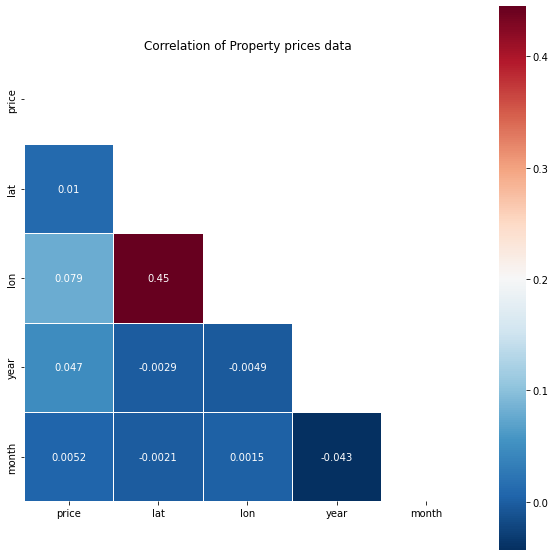

In [30]:
# plotting the correlation matrix to verify the correlation
plt.figure(figsize=(10,10))
mask=np.zeros_like(df1.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=df1.corr(),annot=True,square=True,mask=mask,cmap="RdBu_r",linewidths=1,linecolor="white")
plt.title("Correlation of Property prices data")
plt.show()

In [31]:
# dropping the columns that are not co nsidering for the modelling.
df1.drop(columns = ['postal_code', 'property_size_description'], inplace=True)

In [32]:
# checking the missing values
df1.isna().sum()

date_of_sale            0
address                 0
county                  0
price                   0
FMP                     0
VAT_exclusive           0
property_description    0
province                0
lat                     0
lon                     0
location                0
year                    0
month                   0
dtype: int64

In [33]:
# getting dummy values for the categorical variables
X1 = pd.get_dummies(df1[[ 'county', 'FMP', 'VAT_exclusive','property_description', 'province', 'month', 'location']])


In [34]:
X1.head()

,month,county_Carlow,county_Cavan,county_Clare,county_Cork,county_Donegal,county_Dublin,county_Galway,county_Kerry,county_Kildare,...,VAT_exclusive_No,VAT_exclusive_Yes,property_description_NewHouse,property_description_Second-Hand,province_Connacht,province_Leinster,province_Munster,province_Ulster,location_Dublin,location_Outside
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1


In [35]:
# merging two dataframes to get the final data for LR model
x3 = df1[['date_of_sale','price']]
x2=pd.concat([df1,X1], axis =1)

In [36]:
x2.head(3)

,date_of_sale,address,county,price,FMP,VAT_exclusive,property_description,province,lat,lon,...,VAT_exclusive_No,VAT_exclusive_Yes,property_description_NewHouse,property_description_Second-Hand,province_Connacht,province_Leinster,province_Munster,province_Ulster,location_Dublin,location_Outside
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,343000,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,0,0,1,0,1,0,0,1,0
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,185000,No,Yes,NewHouse,Leinster,52.998458,-7.398034,...,0,1,1,0,0,1,0,0,0,1
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,438500,No,No,Second-Hand,Leinster,53.349764,-6.260273,...,1,0,0,1,0,1,0,0,1,0


## LR with scaling

In [37]:

x3 = x2.copy()
x = x3.drop(columns = ['date_of_sale','address', 'price','county','FMP','VAT_exclusive','property_description', 'location', 'province'],axis=1)
y = x3[['price']]
x=x.values
y=y.values

In [38]:
x

array([[ 5.33497645e+01, -6.26027320e+00,  2.01000000e+03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.29984575e+01, -7.39803380e+00,  2.01000000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 5.33497645e+01, -6.26027320e+00,  2.01000000e+03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.36497844e+01, -6.58852950e+00,  2.02200000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 5.26510216e+01, -7.24849480e+00,  2.02200000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 5.29581467e+01, -6.38197070e+00,  2.02200000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [39]:
y

array([[343000],
       [185000],
       [438500],
       ...,
       [450000],
       [242000],
       [620000]], dtype=int64)

In [40]:
# Scale train and test sets with StandardScaler

data_train, data_test, target_train, target_test = train_test_split( x, y,test_size=0.2, random_state=60)
X_train_std = StandardScaler().fit_transform(data_train)
X_test_std = StandardScaler().fit_transform(data_test)
reg = LinearRegression().fit(X_train_std, target_train)
reg.score(X_test_std, target_test)

-1.0600676407630976e+16

In [41]:
# Make predictions using the testing set
data_y_pred = reg.predict(X_test_std)
print(data_y_pred)

[[-2.76211442e+13]
 [-2.76211443e+13]
 [-2.76211443e+13]
 ...
 [ 4.93727599e+13]
 [-1.50659337e+13]
 [ 1.86471200e+14]]


In [42]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(target_test, data_y_pred)),'.3f'))
print("\nRMSE:\n",rmse)

# MSE (Mean Square Error)
mse = float(format((mean_squared_error(target_test, data_y_pred)),'.3f'))
print("\nMSE:\n",rmse)

# r squared
r = float(format((r2_score(target_test, data_y_pred)),'.3f'))
print("\nr squared:\n",rmse)

#Mean absolute error
mae = float(format((mean_absolute_error(target_test, data_y_pred)),'.3f'))
print("\nMAE:\n",rmse)


RMSE:
 83690786202287.19

MSE:
 83690786202287.19

r squared:
 83690786202287.19

MAE:
 83690786202287.19


## LR without scaling

In [43]:
data_train, data_test, target_train, target_test = train_test_split( x, y,test_size=0.2, random_state=60)

target_test

array([[450000],
       [230000],
       [237500],
       ...,
       [170000],
       [ 45000],
       [ 65000]], dtype=int64)

In [44]:
data_test

array([[ 5.33497645e+01, -6.26027320e+00,  2.02100000e+03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.33497645e+01, -6.26027320e+00,  2.01700000e+03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.33497645e+01, -6.26027320e+00,  2.01700000e+03, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.24601874e+01, -6.60651550e+00,  2.01800000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 5.18970770e+01, -8.46546740e+00,  2.01500000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 5.42273414e+01, -6.14485630e+00,  2.01600000e+03, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [45]:
# Fitting the model 
reg = LinearRegression().fit(data_train, target_train)
reg.score(data_test, target_test)

0.02298679981770846

In [46]:
# Make predictions using the testing set
data_y_pred = reg.predict(data_test)
print(data_y_pred)

[[493696.]
 [430592.]
 [425600.]
 ...
 [188672.]
 [216064.]
 [111872.]]


In [47]:
# The coefficients
print('Coefficients: \n', reg.coef_)


Coefficients: 
 [[-1.15956326e+16 -4.37961522e+15  1.45616228e+04  1.58680152e+10
  -1.58680136e+10 -4.93163263e+15  8.32684821e+14  6.29689531e+14
  -8.43717031e+15  5.38241458e+15  1.72766587e+15 -8.30136157e+15
  -1.01655324e+16  4.73286310e+14 -7.24686566e+15 -3.87304990e+15
   6.10220257e+15 -2.97209914e+14  3.33052761e+15  1.04464568e+16
  -2.03792469e+15  7.22481485e+15  8.18026519e+15 -4.08190686e+15
   2.52156991e+14  3.74506750e+15  3.18195592e+15  1.56917709e+15
   2.83252689e+15 -6.64808661e+15  1.09486285e+14  1.89175894e+11
   1.89175825e+11 -1.44017576e+11 -1.44017694e+11  5.54627956e+05
   3.99812544e+05 -2.39663586e+14 -6.36984647e+14 -1.35190163e+16
   1.43954020e+16  1.72766457e+15 -1.72820018e+15]]


In [48]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(target_test, data_y_pred)),'.3f'))
print("\nRMSE:\n",rmse)

# MSE (Mean Square Error)
mse = float(format((mean_squared_error(target_test, data_y_pred)),'.3f'))
print("\nMSE:\n",rmse)

# r squared
r = float(format((r2_score(target_test, data_y_pred)),'.3f'))
print("\nr squared:\n",rmse)

#Mean absolute error
mae = float(format((mean_absolute_error(target_test, data_y_pred)),'.3f'))
print("\nMAE:\n",rmse)


RMSE:
 803454.106

MSE:
 803454.106

r squared:
 803454.106

MAE:
 803454.106


In [49]:
## LR Prediction

In [50]:
y_pred = reg.predict(data_test)

In [51]:
df_preds = pd.DataFrame({'Actual': target_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0       450000   493696.0
1       230000   430592.0
2       237500   425600.0
3       399000   226304.0
4       185000   268544.0
...        ...        ...
103154  175000   217600.0
103155  165000   303872.0
103156  170000   188672.0
103157   45000   216064.0
103158   65000   111872.0

[103159 rows x 2 columns]


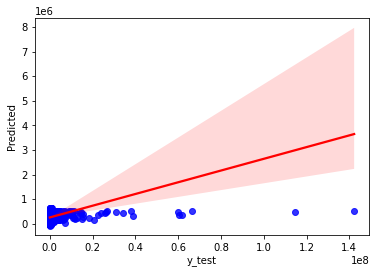

In [52]:
# predicted values regression plot

sns.regplot(x=target_test,y=y_pred,ci=95,color ='blue', line_kws={"color": "red"});
plt.xlabel('y_test')
plt.ylabel('Predicted')
plt.show()

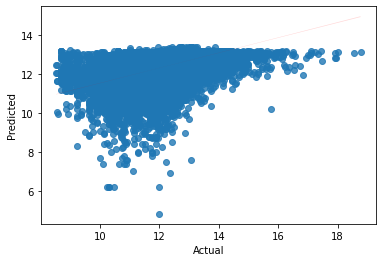

In [53]:
sns.regplot(np.log(target_test),np.log(y_pred),truncate = True, line_kws={"color": "red","alpha":1,"lw":8})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

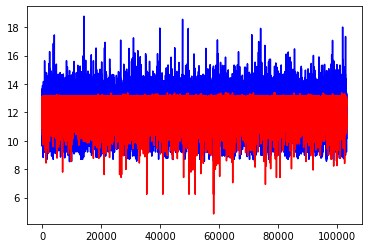

In [54]:
plt.plot(np.log(target_test),color='blue')
plt.plot(np.log(y_pred),color='red')
plt.show()

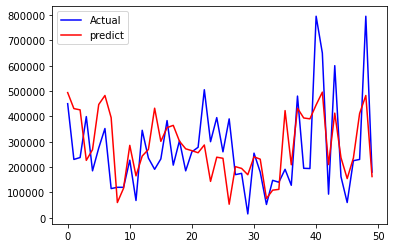

In [55]:
# actual and predicted vales zoomed plot
plot_target = target_test[:50]
plot_ypred = y_pred[:50]

plt.plot(plot_target,color = 'blue',label='Actual')
plt.plot(plot_ypred,color = 'red',label='predict')
plt.legend()
plt.show()

## DCT

In [90]:
# x and y data
x4 = x2.copy()
X = x4.drop(columns = ['date_of_sale','address', 'price','county','FMP','VAT_exclusive','property_description', 'location', 'province'],axis=1)
y = x4['price']


In [91]:
# train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [92]:
# fitting the model
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=44)

In [143]:
predictions = model.predict(X_test)
print((predictions))

[302270.08910891 385111.71150442 166924.22       ... 546120.76932084
 119447.83673469 343931.7302726 ]


In [95]:
# The coefficients
print('Coefficients: \n', reg.coef_)

rmse = float(format(np.sqrt(mean_squared_error(y_test, predictions)),'.3f'))
print("RMSE:",rmse)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

print("MAE : %.2f" % mean_absolute_error(y_test, predictions))

Coefficients: 
 [[-1.15956326e+16 -4.37961522e+15  1.45616228e+04  1.58680152e+10
  -1.58680136e+10 -4.93163263e+15  8.32684821e+14  6.29689531e+14
  -8.43717031e+15  5.38241458e+15  1.72766587e+15 -8.30136157e+15
  -1.01655324e+16  4.73286310e+14 -7.24686566e+15 -3.87304990e+15
   6.10220257e+15 -2.97209914e+14  3.33052761e+15  1.04464568e+16
  -2.03792469e+15  7.22481485e+15  8.18026519e+15 -4.08190686e+15
   2.52156991e+14  3.74506750e+15  3.18195592e+15  1.56917709e+15
   2.83252689e+15 -6.64808661e+15  1.09486285e+14  1.89175894e+11
   1.89175825e+11 -1.44017576e+11 -1.44017694e+11  5.54627956e+05
   3.99812544e+05 -2.39663586e+14 -6.36984647e+14 -1.35190163e+16
   1.43954020e+16  1.72766457e+15 -1.72820018e+15]]
RMSE: 913160.658
Mean squared error: 833862387387.05
Variance score: 0.01
MAE : 139920.77


In [107]:
df_preds_dc = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df_preds_dc)

        Actual      Predicted
484054  110000  205828.828829
364853  290748  599879.462366
280199   40000  116750.000000
279611  207000  293641.608392
347259  316704  388244.272251
...        ...            ...
469907   97000  147442.307692
408478  260000  171915.625000
501646  391000  499980.182576
418445  255000  127871.760000
295827  316300   51395.000000

[103159 rows x 2 columns]


In [144]:
df_preds_dc.reset_index(drop=True, inplace=True)
df_preds_dc

,Actual,Predicted
0,110000,205828.828829
1,290748,599879.462366
2,40000,116750.000000
3,207000,293641.608392
4,316704,388244.272251
...,...,...
103154,97000,147442.307692
103155,260000,171915.625000
103156,391000,499980.182576
103157,255000,127871.760000


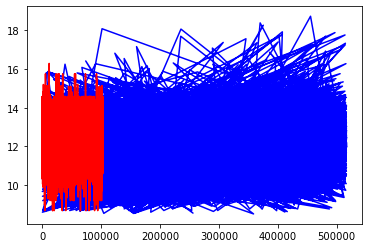

In [113]:
plt.plot(np.log(y_test),color='blue')
plt.plot(np.log(predictions),color='red')
plt.show()

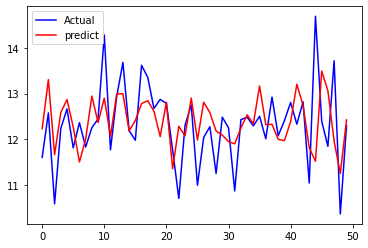

In [145]:
# actual and predicted values plot
df_first = df_preds_dc.iloc[:50]
#plot_target = Actual[:50]
#plot_ypred = Predicted[:50]

plt.plot(np.log(df_first['Actual']),color = 'blue',label='Actual')
plt.plot(np.log(df_first['Predicted']),color = 'red',label='predict')
#plt.xscale('log')
plt.legend()
plt.show()

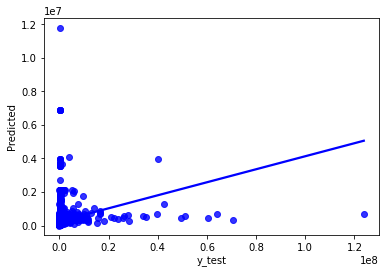

In [146]:
sns.regplot(x=y_test,y=predictions,ci=None,color ='blue');
plt.xlabel('y_test')
plt.ylabel('Predicted')
plt.show()

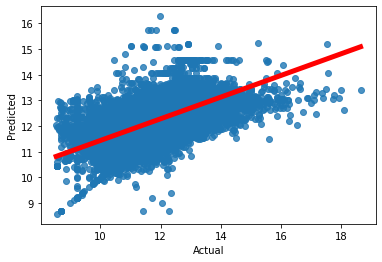

In [147]:
# regression plot with predicted values
sns.regplot(np.log(y_test),np.log(predictions),truncate = True,  line_kws={"color": "red","alpha":1,"lw":5})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [66]:
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10,8), dpi=150)
#plot_tree(model, feature_names=X.columns);

In [67]:
# printing the column names
#for col in x2.columns:
    #print(col)#

## SVM

In [68]:
## Full data is not working for SVM so resampled data and performed svm

In [69]:
data = x2.copy()

df1 = data.set_index('date_of_sale')


In [70]:
# downsampling the data
df11 = df1.resample('M').mean().reset_index()

df11

,date_of_sale,price,lat,lon,year,month,month,county_Carlow,county_Cavan,county_Clare,...,VAT_exclusive_No,VAT_exclusive_Yes,property_description_NewHouse,property_description_Second-Hand,province_Connacht,province_Leinster,province_Munster,province_Ulster,location_Dublin,location_Outside
0,2010-01-31,262845.947321,53.112111,-7.159323,2010.0,1.0,1.0,0.013393,0.014286,0.020536,...,0.757143,0.242857,0.246429,0.753571,0.088393,0.617857,0.241071,0.052679,0.352679,0.647321
1,2010-02-28,263288.903589,53.135545,-7.198204,2010.0,2.0,2.0,0.008445,0.014778,0.020408,...,0.705841,0.294159,0.297678,0.702322,0.101337,0.599578,0.247009,0.052076,0.339198,0.660802
2,2010-03-31,248024.310990,53.127986,-7.227953,2010.0,3.0,3.0,0.007850,0.014493,0.014493,...,0.699275,0.300725,0.304952,0.695048,0.100845,0.585749,0.248792,0.064614,0.330918,0.669082
3,2010-04-30,245834.783833,53.127216,-7.216835,2010.0,4.0,4.0,0.009798,0.014697,0.025107,...,0.736681,0.263319,0.265769,0.734231,0.105940,0.600122,0.241886,0.052051,0.344152,0.655848
4,2010-05-31,237834.893157,53.127094,-7.232366,2010.0,5.0,5.0,0.010204,0.012005,0.022809,...,0.740096,0.259904,0.268307,0.731693,0.105642,0.597839,0.244898,0.051621,0.345738,0.654262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2021-09-30,369292.726601,53.100522,-7.277377,2021.0,9.0,9.0,0.010989,0.016862,0.023115,...,0.872300,0.127700,0.138878,0.861122,0.113869,0.586207,0.255400,0.044524,0.301250,0.698750
141,2021-10-31,321953.133685,53.102351,-7.288673,2021.0,10.0,10.0,0.012550,0.011822,0.024918,...,0.855038,0.144962,0.145507,0.854493,0.116406,0.576391,0.261004,0.046199,0.284649,0.715351
142,2021-11-30,343831.303375,53.125926,-7.263275,2021.0,11.0,11.0,0.008872,0.014272,0.023529,...,0.826422,0.173578,0.174542,0.825458,0.114561,0.583799,0.250338,0.051302,0.287753,0.712247
143,2021-12-31,381504.600244,53.123397,-7.248151,2021.0,12.0,12.0,0.015641,0.015641,0.020313,...,0.779606,0.220394,0.221613,0.778387,0.107455,0.595572,0.247816,0.049157,0.271785,0.728215


In [71]:
X_l = df11.drop(columns = ['date_of_sale', 'price'],axis=1)
y_p = df11[['price']]

In [72]:
X_l

,lat,lon,year,month,month,county_Carlow,county_Cavan,county_Clare,county_Cork,county_Donegal,...,VAT_exclusive_No,VAT_exclusive_Yes,property_description_NewHouse,property_description_Second-Hand,province_Connacht,province_Leinster,province_Munster,province_Ulster,location_Dublin,location_Outside
0,53.112111,-7.159323,2010.0,1.0,1.0,0.013393,0.014286,0.020536,0.112500,0.028571,...,0.757143,0.242857,0.246429,0.753571,0.088393,0.617857,0.241071,0.052679,0.352679,0.647321
1,53.135545,-7.198204,2010.0,2.0,2.0,0.008445,0.014778,0.020408,0.109078,0.026038,...,0.705841,0.294159,0.297678,0.702322,0.101337,0.599578,0.247009,0.052076,0.339198,0.660802
2,53.127986,-7.227953,2010.0,3.0,3.0,0.007850,0.014493,0.014493,0.109300,0.035628,...,0.699275,0.300725,0.304952,0.695048,0.100845,0.585749,0.248792,0.064614,0.330918,0.669082
3,53.127216,-7.216835,2010.0,4.0,4.0,0.009798,0.014697,0.025107,0.112676,0.029394,...,0.736681,0.263319,0.265769,0.734231,0.105940,0.600122,0.241886,0.052051,0.344152,0.655848
4,53.127094,-7.232366,2010.0,5.0,5.0,0.010204,0.012005,0.022809,0.118247,0.027611,...,0.740096,0.259904,0.268307,0.731693,0.105642,0.597839,0.244898,0.051621,0.345738,0.654262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,53.100522,-7.277377,2021.0,9.0,9.0,0.010989,0.016862,0.023115,0.116332,0.021978,...,0.872300,0.127700,0.138878,0.861122,0.113869,0.586207,0.255400,0.044524,0.301250,0.698750
141,53.102351,-7.288673,2021.0,10.0,10.0,0.012550,0.011822,0.024918,0.111677,0.028192,...,0.855038,0.144962,0.145507,0.854493,0.116406,0.576391,0.261004,0.046199,0.284649,0.715351
142,53.125926,-7.263275,2021.0,11.0,11.0,0.008872,0.014272,0.023529,0.112440,0.029122,...,0.826422,0.173578,0.174542,0.825458,0.114561,0.583799,0.250338,0.051302,0.287753,0.712247
143,53.123397,-7.248151,2021.0,12.0,12.0,0.015641,0.015641,0.020313,0.104002,0.024985,...,0.779606,0.220394,0.221613,0.778387,0.107455,0.595572,0.247816,0.049157,0.271785,0.728215


In [73]:
StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(X_l)
y_p = StdS_y.fit_transform(y_p)

In [74]:
# train test splitting
xtrain,xtest,ytrain,ytest=train_test_split(X_l,y_p)

In [75]:
# import the model
# create the model object
#regressor = SVR(kernel = 'rbf')
# fit the model on the data
#regressor.fit(X_l, y_p)

In [76]:
regressor=SVR(kernel='rbf',epsilon=1.0)
regressor.fit(xtrain,ytrain)
pred=regressor.predict(xtest)
#print(regressor.score(xtest,ytest))
#print(r2_score(ytest,pred))

In [77]:
df_preds_svr = pd.DataFrame({'Actual': ytest.squeeze(), 'Predicted': pred.squeeze()})
print(df_preds_svr)

      Actual  Predicted
0   0.096010   0.248223
1  -1.022239   0.132130
2  -1.238820  -0.065211
3   0.691773   0.967616
4   0.972188   1.017724
5  -1.408238  -0.181324
6  -0.890163  -0.075971
7  -0.786603   0.110893
8  -0.013640   0.346420
9  -0.204139   0.025203
10 -1.231745  -0.267182
11 -1.144272  -0.219526
12 -1.084885  -0.118932
13  0.044535   0.341411
14 -0.014794   0.609227
15  1.214379   0.347898
16  0.273585   0.569845
17  1.556183   1.162663
18  0.590133   0.473668
19  0.959316   0.822958
20 -0.849302  -0.146258
21  0.318015   0.466629
22 -0.289501   0.100342
23 -0.330444   0.193875
24  0.249273   0.665113
25 -0.279463   0.123164
26  0.238202   0.523589
27 -0.864422  -0.096892
28 -0.589882   0.192467
29  0.169544   0.100802
30 -0.370140   0.034065
31 -0.452679  -0.123505
32 -0.547663  -0.251591
33  1.507158   0.897814
34  0.893259   0.403037
35 -0.732959   0.213984
36 -1.067505   0.164734


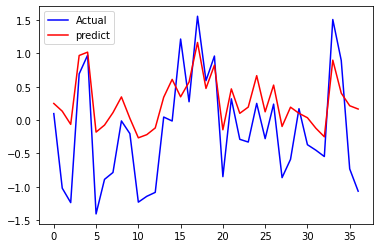

In [78]:
# zoomed version of actual vs predicted values plot
plot_target = ytest[:50]
plot_ypred = pred[:50]

plt.plot((plot_target),color = 'blue',label='Actual')
plt.plot((plot_ypred),color = 'red',label='predict')
plt.legend()
plt.show()

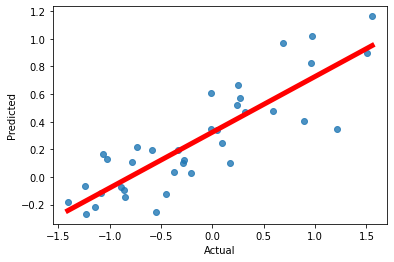

In [79]:
sns.regplot((ytest),(pred),ci=None,  line_kws={"color": "red","alpha":1,"lw":5})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [80]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(ytest, pred)),'.3f'))
print("\nRMSE:\n",rmse)

# MSE (Mean Square Error)
rmse = float(format((mean_squared_error(ytest, pred)),'.3f'))
print("\nMSE:\n",rmse)

# r squared
rmse = float(format((r2_score(ytest, pred)),'.3f'))
print("\nr squared:\n",rmse)

#Mean absolute error
rmse = float(format((mean_absolute_error(ytest, pred)),'.3f'))
print("\nMAE:\n",rmse)


RMSE:
 0.66

MSE:
 0.436

r squared:
 0.315

MAE:
 0.56


In [81]:
# k-fold CV (using all the 13 variables)
#lm = LinearRegression()
scores = cross_val_score(regressor, xtrain, ytrain, scoring='r2', cv=5)
scores   

array([0.4068367 , 0.49475924, 0.07012188, 0.38539879, 0.13695189])

In [82]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(regressor, xtrain, ytrain, scoring='r2', cv=folds)
scores   

array([0.34038544, 0.4246089 , 0.29842474, 0.19676639, 0.45313944])

## XGBoost

In [83]:
d1 = x2.copy()
X = d1.drop(columns = ['date_of_sale','address', 'price','county','FMP','VAT_exclusive','property_description', 'location', 'province'],axis=1)
y = d1[['price']]
X=X.values
y=y.values

In [86]:
d2 = x2.copy()
X = d2.drop(columns = ['date_of_sale','address', 'price','county','FMP','VAT_exclusive','property_description', 'location', 'province'],axis=1)
Y = d2[['price']]
X=X.values
Y=Y.values

In [87]:
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [88]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [89]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 0.00%


In [90]:
print("r2 score : ",metrics.r2_score(y_test, y_pred))

print("MSE : ",metrics.mean_squared_error(y_test, y_pred))

print("MAE: ",metrics.mean_absolute_error(y_test, y_pred))

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("RMSE:",rmse)

r2 score :  0.010158798131005953
MSE :  427713148859.7502
MAE:  134917.8193297369
RMSE: 653997.8202255343


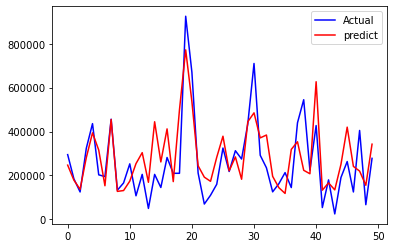

In [92]:
# actual vs predicted values plot
plot_target = y_test[:50]
plot_ypred = y_pred[:50]

plt.plot((plot_target),color = 'blue',label='Actual')
plt.plot((plot_ypred),color = 'red',label='predict')
plt.legend()
plt.show()

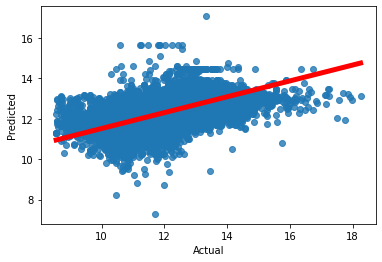

In [93]:
# regression plot with predicted values
sns.regplot(np.log(y_test),np.log(y_pred),truncate=True,  line_kws={"color": "red","alpha":1,"lw":5})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [94]:
# cross validation
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.01545022, 0.02546036, 0.02494539, 0.02001471, 0.05778371])

In [95]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [96]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=folds)
#scores 


print(f'Scores for each fold: {score}')


Scores for each fold: [-1.32972675e+12 -1.11243199e+12 -1.37269553e+12 -7.95479626e+11
 -3.69192413e+11 -4.83929617e+11 -8.80375241e+11 -1.09150470e+12
 -4.30108471e+11 -9.28513602e+11]


In [97]:
rmse(score.mean())

rmse= 937761.05


In [98]:
rmse = np.sqrt(-score)
print("Average RMSE: {}".format(np.mean(rmse)))

Average RMSE: 917709.1619922107


## RF

In [103]:
d3 = x2.copy()
X = d3.drop(columns = ['date_of_sale','address', 'price','county','FMP','VAT_exclusive','property_description', 'location', 'province'],axis=1)
y = d3['price']
X=X.values
y=y.values

In [104]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [105]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [106]:
# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [107]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

In [108]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)

# MSE (Mean Square Error)
rmse = float(format((mean_squared_error(y_test, y_pred)),'.3f'))
print("\nMSE:\n",rmse)
 
# r squared
rmse = float(format((r2_score(y_test, y_pred)),'.3f'))
print("\nr squared:\n",rmse)

#Mean absolute error
rmse = float(format((mean_absolute_error(y_test, y_pred)),'.3f'))
print("\nMAE:\n",rmse)


RMSE:
 1094282.69

MSE:
 1197454605589.613

r squared:
 0.004

MAE:
 140099.601


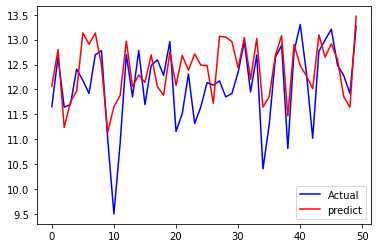

In [109]:
plot_target = y_test[:50]
plot_ypred = y_pred[:50]

plt.plot(np.log(plot_target),color = 'blue',label='Actual')
plt.plot(np.log(plot_ypred),color = 'red',label='predict')
plt.legend()
plt.show()

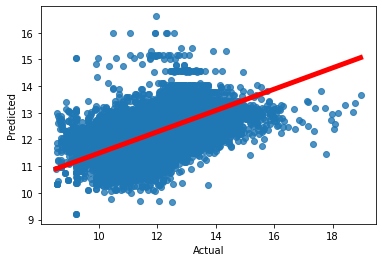

In [110]:
sns.regplot(np.log(y_test),np.log(y_pred),truncate=True,  line_kws={"color": "red","alpha":1,"lw":5})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## NN

In [117]:
d6 = x2.copy()
X = d6.drop(columns = ['date_of_sale','address', 'price','county','FMP','VAT_exclusive','property_description', 'location', 'province'],axis=1)
y = d6['price']
X=X.values
y=y.values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

In [119]:
print(X_train.shape); print(X_test.shape)

(412633, 43)
(103159, 43)


In [120]:
reg = MLPRegressor(hidden_layer_sizes=(43,43,43),activation="relu" ,random_state=1, max_iter=100).fit(X_train, y_train)

In [121]:
y_pred=reg.predict(X_test)

In [122]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
print("\nRMSE:\n",rmse)

# MSE (Mean Square Error)
rmse = float(format((mean_squared_error(y_test, y_pred)),'.3f'))
print("\nMSE:\n",rmse)

# r squared
rmse = float(format((r2_score(y_test, y_pred)),'.3f'))
print("\nr squared:\n",rmse)

#Mean absolute error
rmse = float(format((mean_absolute_error(y_test, y_pred)),'.3f'))
print("\nMAE:\n",rmse)


RMSE:
 728057.406

MSE:
 530067586324.427

r squared:
 0.022

MAE:
 153320.551


In [123]:
y_pred

array([517601.27951495, 471921.46655917, 254942.0759068 , ...,
       476682.06053747, 162155.08024644, 471683.95104373])

In [124]:
y_test

array([193832, 267500, 135000, ..., 245000, 230000, 317000], dtype=int64)

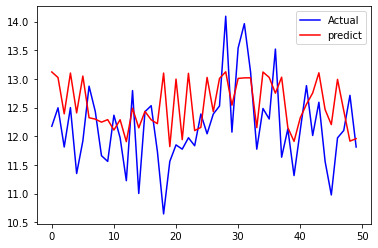

In [118]:
plot_target = y_test[:50]
plot_ypred = y_pred[:50]

plt.plot(np.log(plot_target),color = 'blue',label='Actual')
plt.plot(np.log(plot_ypred),color = 'red',label='predict')
plt.legend()
plt.show()

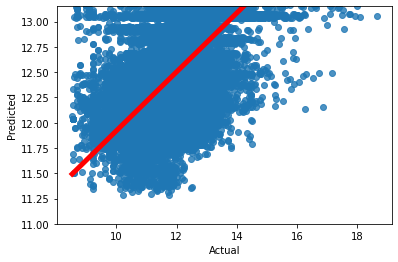

In [133]:
sns.regplot(np.log(y_test),np.log(y_pred),  line_kws={"color": "red","alpha":1,"lw":5})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.ylim(11,13.15)
#plt.xlim(10,17)
plt.show()